In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importing the csv file

In [3]:
data = pd.read_csv('mtl-crime-data.csv')

Let's explore :)

In [4]:
data.head()

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136642 entries, 0 to 136641
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     136642 non-null  int64  
 1   category       136642 non-null  object 
 2   date           136642 non-null  object 
 3   postal_code    136642 non-null  object 
 4   city           136642 non-null  object 
 5   neighbourhood  136642 non-null  object 
 6   year           136642 non-null  int64  
 7   count          136642 non-null  int64  
 8   longitude      136642 non-null  float64
 9   latitude       136642 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 10.4+ MB


Let's clean the data

In [6]:
data.columns

Index(['Unnamed: 0', 'category', 'date', 'postal_code', 'city',
       'neighbourhood', 'year', 'count', 'longitude', 'latitude'],
      dtype='object')

In [9]:
data['date']=pd.to_datetime(data['date'])
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
Unnamed: 0,int64
category,object
date,datetime64[ns]
postal_code,object
city,object
neighbourhood,object
year,int64
count,int64
longitude,float64


In [10]:
pd.DataFrame(data.isnull().sum(),columns=['Missing Values']).rename

<bound method DataFrame.rename of                Missing Values
Unnamed: 0                  0
category                    0
date                        0
postal_code                 0
city                        0
neighbourhood               0
year                        0
count                       0
longitude                   0
latitude                    0>

zero null values slay!


 Which neighbourhoods have the highest number of reported crimes? "thinking emoji"
 

lets find out 

In [11]:
top_neighbourhood = pd.DataFrame(data['neighbourhood'].value_counts()).rename({"neighbourhood":"Case Reported"}, axis = 1).rename_axis("Neighbourhood").head(10)

top_neighbourhood.style.bar()

,Case Reported
Neighbourhood,
Plateau Mont-Royal,10844
Centre-Sud,7849
Downtown Montreal,7565
Mercier,7302
Montréal-Nord,6913
Rosemont,5907
Ahuntsic,5575
Petite-Patrie,5327
Saint-Laurent,5094


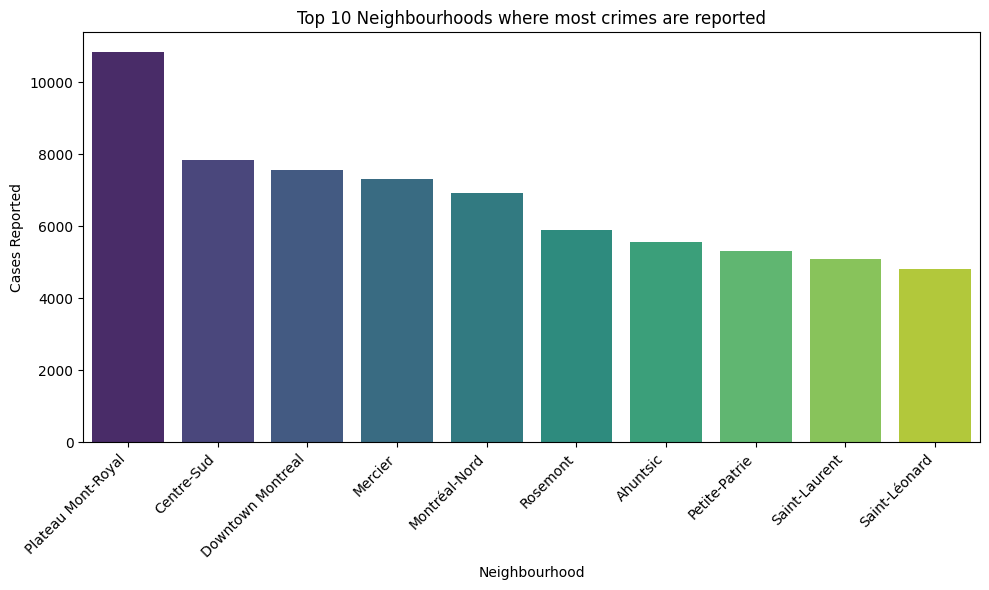

In [15]:
top_neighbourhood = top_neighbourhood.sort_values(by='Case Reported', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_neighbourhood, x=top_neighbourhood.index, y='Case Reported', palette='viridis')

plt.xlabel('Neighbourhood')
plt.ylabel('Cases Reported')
plt.title('Top 10 Neighbourhoods where most crimes are reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

What are the most frequent crimes by neighbourhood?

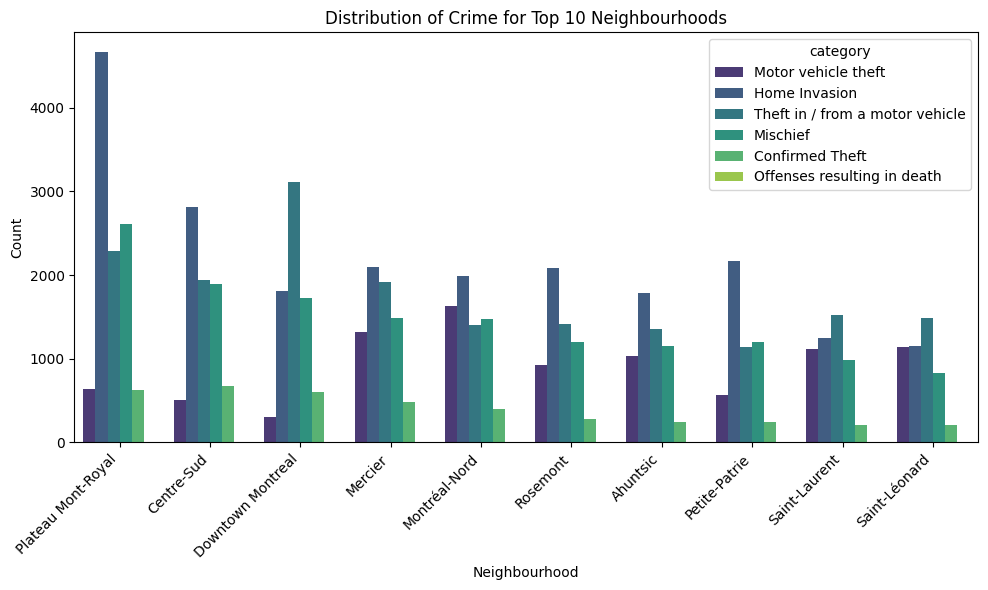

In [16]:
# Calculate the top 10 neighbourhoods with highest crime rate
top_neighbourhoods = data['neighbourhood'].value_counts().head(10).index

# Filter the data to include only the top 10 neighbourhoods
data_top_neighbourhoods = data[data['neighbourhood'].isin(top_neighbourhoods)]

# Get the order of neighborhoods by crime count in descending order
neighbourhood_order = data_top_neighbourhoods.groupby('neighbourhood')['category'].count().sort_values(ascending=False).index

# Create a count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=data_top_neighbourhoods, x='neighbourhood', hue='category', palette='viridis', order=neighbourhood_order)

# Adding labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Crime for Top 10 Neighbourhoods')

# Slightly rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

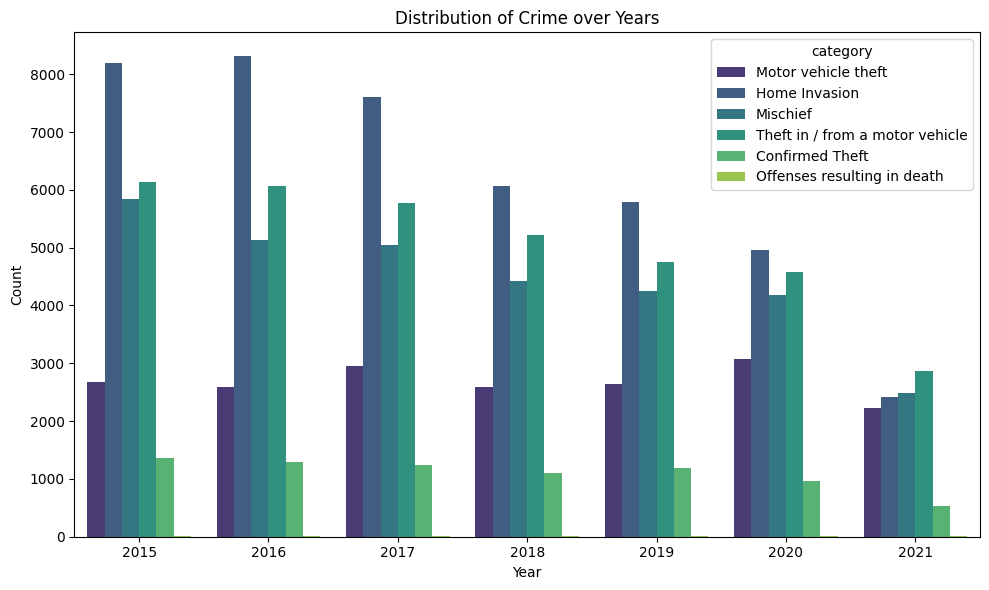

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year', hue='category', palette='viridis')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Crime over Years')

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
pd.DataFrame(data['year'].value_counts()).rename({"year":"Case Reported"}, axis = 1).rename_axis("Year")

,Case Reported
Year,
2015,24222
2016,23407
2017,22611
2018,19419
2019,18650
2020,17786
2021,10547


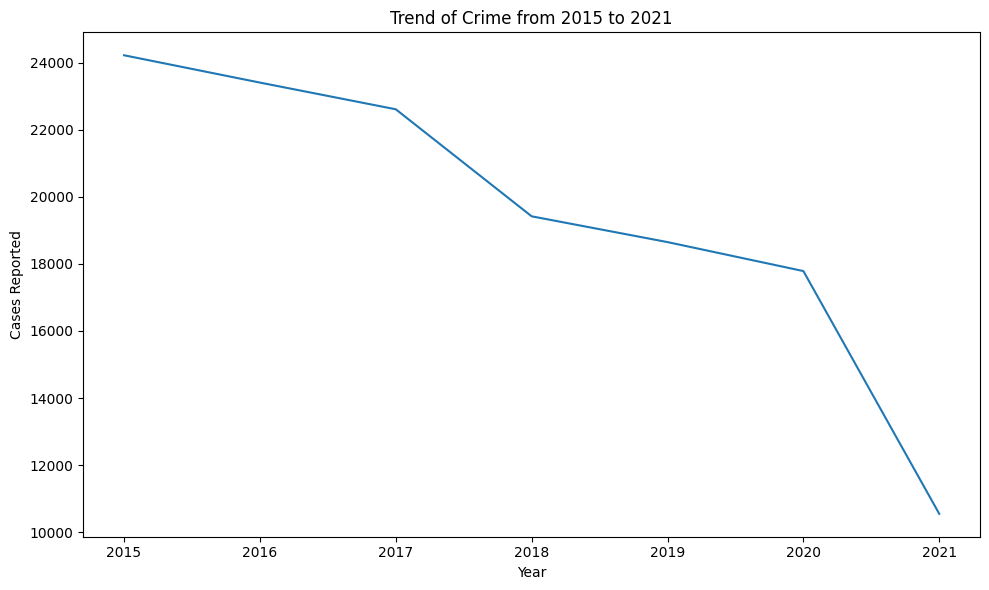

In [19]:
# Calculate the year-wise trend of crime rates
year_wise_trend = data.groupby('year').sum(numeric_only=True).drop(['longitude', 'latitude'], axis=1).rename({'count': 'Case Reported'}, axis=1)

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_trend, x=year_wise_trend.index, y='Case Reported')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cases Reported')
plt.title('Trend of Crime from 2015 to 2021')

# Display the plot
plt.tight_layout()
plt.show()

On what days and months are a higher number of crimes reported?
Let's explore the types of crime committed depending on the day of the week.

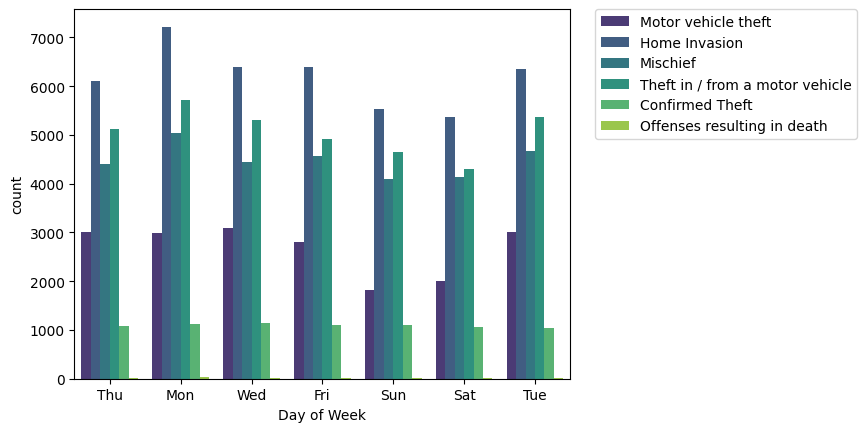

In [20]:
data['Month'] = data['date'].apply(lambda time: time.month)
data['Day of Week'] = data['date'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)
sns.countplot(x='Day of Week',data=data,hue='category',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that Monday has the highest rate of Home Invasions.

Saturday and Sunday have the lowest number of Motor Vehicle Thefts.


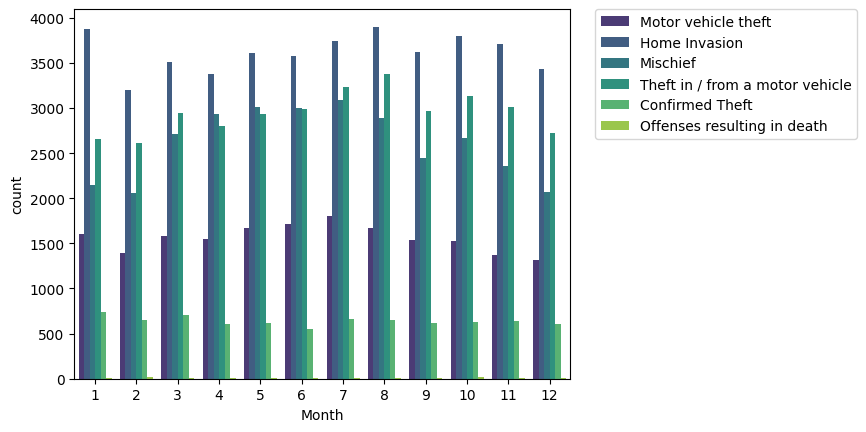

In [21]:
sns.countplot(x='Month', data=data, hue='category', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

exploring the types of crime committed depending on the month of the year resaulted in these conclusions :
January and August have the highest numbers of Home Invasions.
July and August have the highest numbers of Confirmed Thefts.


Let's explore the overall correlation between the time of year and the reported number of crimes between 2015-2021.
Which days/months have the highest number of total reported crimes?

In [22]:
data.head()

,Unnamed: 0,category,date,postal_code,city,neighbourhood,year,count,longitude,latitude,Month,Day of Week
0,0,Motor vehicle theft,2018-09-13,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,9,Thu
1,1,Motor vehicle theft,2018-04-30,H1Z 1S9,MONTREAL,Saint-Michel,2018,1,-73.626,45.567,4,Mon
2,2,Home Invasion,2018-01-10,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,1,Wed
3,3,Mischief,2018-11-12,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,11,Mon
4,4,Mischief,2018-08-15,H1Z 2V6,MONTREAL,Saint-Michel,2018,1,-73.629,45.569,8,Wed


In [23]:
#correlation between days/months

dayMonth = data.groupby(by=['Day of Week', 'Month']).count()['category'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1706,1519,1630,1692,1685,1694,1809,1685,1590,1698,1624,1460
Mon,1742,1636,1830,1803,1872,1931,2068,2150,1743,1879,1802,1647
Sat,1372,1275,1371,1417,1443,1428,1459,1456,1425,1506,1345,1394
Sun,1299,1265,1420,1428,1550,1394,1587,1578,1487,1450,1470,1285
Thu,1734,1403,1652,1679,1685,1674,1818,1861,1521,1666,1607,1466


<AxesSubplot: xlabel='Month', ylabel='Day of Week'>

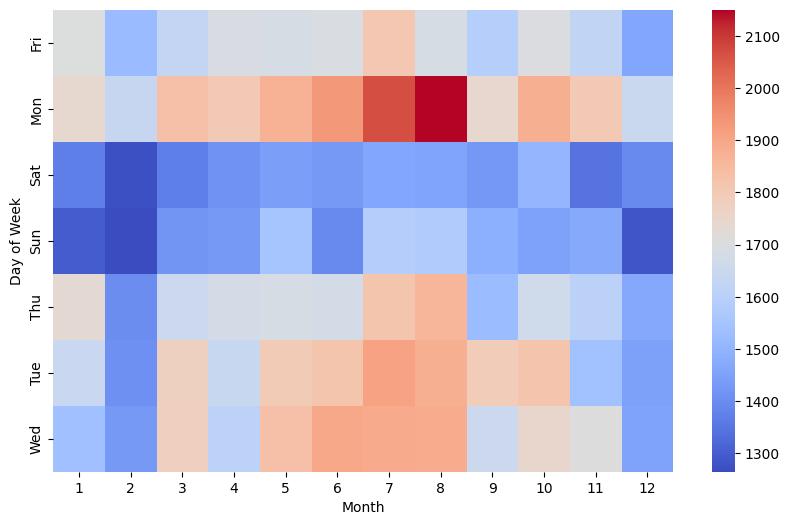

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth,cmap='coolwarm')

Overall, Monday has the highest number of reported crimes in the period between 2015-2021, followed by Tuesday and Wednesday.

We can also see that June, July and August have higher numbers of reported crimes.

2015 - 2021 Crime Data Analysis Final Results
Neighbourhoods with highest number of reported crimes:
Plateau
Centre-Sud
Downtown
Mondays have the highest number of reported crimes, followed by Tuesday and Wednesday
August is the month with most number of reported crimes, followed by July and June
Home invasions are the most reported crime, followed by theft in/from a motor vehicle and mischief
2015 had the highest crime rate (24,222 cases), and 2021 the lowest (10,547 cases.
Overall, crime reports decreased every year from 2015 to 2021